## Supervised Learning

### 1. Linear Regression
One of the supervised machine learning problem that observes continuous features and predicts an outcome. It can be used for one or more variables. It is mostly used for value estimation from continuous variables.

##### Advantages:
1. Exceptionally well for linearly separable data
2. Easy to implement

##### Disadvantages:
1. Prone to noise and overfitting (can be resolved using dimension reduction and regularization)
2. Sensitive to outlier data.

##### Use cases:
1. Forecasting
2. Risk analysis
3. Price prediction

In [60]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
# Loading dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 2]
print(type(diabetes))
print(diabetes_X.shape)

<class 'sklearn.utils.Bunch'>
(442, 1)


In [63]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

print(diabetes_X_test.shape)
print(diabetes_y_test.size)

(20, 1)
20


In [64]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [65]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [938.23786125]


In [66]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Mean squared error: 2548.07


In [67]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficient of determination: 0.47


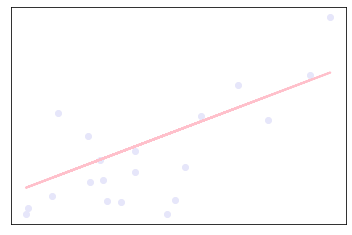

In [68]:
# Plot output
plt.scatter(diabetes_X_test, diabetes_y_test,color = 'lavender')
plt.plot(diabetes_X_test, diabetes_y_pred,color = 'pink',linewidth = 2)
plt.xticks(())
plt.yticks(())
plt.show()

### 2. Logistic Regression
Supervised classification technique in Machine Learning which is used to estimate discrete values. It uses logistic function to predict probability between 0 and 1.

##### Advantages:
1. Best for binary classification
2. Easy to implement without requiring too many computational resource

##### Disadvantages:
1. Cannot solve non-linear problems because of linear decision surface
2. Same as linear regression, it is prone to overfitting.

##### Use cases:
1. Binary classification
2. Multiclass classification in a few cases (i.e. with small dataset)

In [43]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [55]:
# Creating dataset
xmin,xmax = -7,7 #Test set; straight line with Gaussian noise
n_samples = 77
np.random.seed(0)
x = np.random.normal(size = n_samples)
y = (x > 0).astype(np.float)
x[x > 0] *= 3
x += .4 * np.random.normal(size = n_samples)
x = x[:, np.newaxis]

print(x.shape)
print(y.shape)

(77, 1)
(77,)


In [45]:
# Creating logistic regression classifier
clf = linear_model.LogisticRegression(C = 1e4)
clf.fit(x, y)

LogisticRegression(C=10000.0)

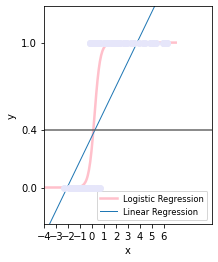

In [52]:
# Scatter plot for logistic regression
plt.figure(1, figsize = (3, 4))
plt.clf()
plt.scatter(x.ravel(), y, color = 'lavender', zorder = 17)

# Curve plot for logistic regression
x_test = np.linspace(-7, 7, 277)
def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(x_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(x_test,loss, color = 'pink', linewidth = 2.5)

# Line plot for linear regression
ols = linear_model.LinearRegression()
ols.fit(x, y)
plt.plot(x_test, ols.coef_ * x_test + ols.intercept_, linewidth = 1)
plt.axhline(.4,color='.4')

# Setting labels
plt.ylabel('y')
plt.xlabel('x')
plt.xticks(range(-7, 7))
plt.yticks([0, 0.4,1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression','Linear Regression'),loc = 'lower right', fontsize = 'small')
plt.show()

### 3. Decision Tree
A supervised Machine Learning algorthim that can be used for both classification and regression, but mostly for classification. It uses tree-like traversal to compare important features with a conditional statement. It works with both categorical and continuous dependent variables.

##### Advantages:
1. Very few hyperparamters
2. Easy to explain as it follows human approach to ake decision

##### Disadvantages:
1. High probability of overfitting
2. Gives low prediction accuracy in comparison to other ML algorithms

##### Use cases:
1. Data exploration
2. Pattern recognition
3. Price prediction

In [83]:
Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [84]:
# Importing dataset
def importdata():
    balance_data = pd.read_csv("https://archive.ics.uci.edu/ml/"
                               + "machine-learning-databases/balance-scale/balance-scale.data",
                           sep = ',', header = None)
    print(len(balance_data))
    print(balance_data.shape)
    print(balance_data.head())
    return balance_data

In [72]:
# Splitting dataset
def splitdataset(balance_data):
    x = balance_data.values[:,1:5]
    y = balance_data.values[:,0]
    x_train, x_test, y_train, y_test = train_test_split(
                            x, y, test_size = 0.3, random_state = 100)
    return x, y, x_train, x_test, y_train, y_test

In [73]:
# Training with giniIndex
def train_using_gini(x_train, x_test, y_train):
    clf_gini = DecisionTreeClassifier(criterion = "gini",
    random_state = 100, max_depth = 3, min_samples_leaf = 5)
    clf_gini.fit(x_train,y_train)
    return clf_gini

In [74]:
# Training with entropy
def train_using_entropy(x_train,x_test,y_train):
    clf_entropy = DecisionTreeClassifier(
    criterion = "entropy", random_state = 100,
    max_depth = 3, min_samples_leaf = 5)
    clf_entropy.fit(x_train,y_train)
    return clf_entropy

In [75]:
# Making predictions
def prediction(x_test,clf_object):
    y_pred = clf_object.predict(x_test)
    print(f"Predicted values: {y_pred}")
    return y_pred

In [104]:
# Calculating accuracy
def cal_accuracy(y_test, y_pred):
    print(accuracy_score(y_test, y_pred) * 100)
    print(classification_report(y_test, y_pred))

In [79]:
data = importdata()

625
(625, 5)
   0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


In [80]:
x,y,x_train,x_test,y_train,y_test = splitdataset(data)
clf_gini = train_using_gini(x_train, x_test, y_train)
clf_entropy = train_using_entropy(x_train, x_test, y_train)
y_pred_gini = prediction(x_test, clf_gini)

Predicted values: ['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']


In [105]:
cal_accuracy(y_test, y_pred_gini)

73.40425531914893
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.73      0.79      0.76        85
           R       0.74      0.79      0.76        90

    accuracy                           0.73       188
   macro avg       0.49      0.53      0.51       188
weighted avg       0.68      0.73      0.71       188



D:\Anaconda3\envs\ai\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4. Support Vector Machines
One of the most ML algorithms for supervised classification. It plots lines to categorize the data and calculate the vector to optimize the line. It is to ensure that closest point in each group lies farthest from each other.

#### Advantages:
1. More effective with increase in dimensions of the data.
2. Effective when there is clear margin of separation between classes.

#### Disadvantages:
1. Not suitable for large or overlapping datasets.
2. Not suitable for dataset where no. of features is more than no. of samples.

#### Use cases:
1. Face Detection
2. Hand-writing recognition
3. Protein classification

In [95]:
# Importing libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

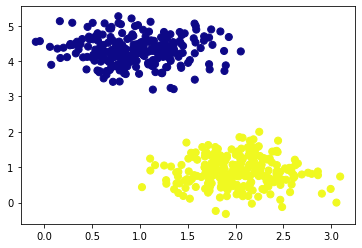

In [96]:
# Loading dataset
x, y = make_blobs(n_samples = 500,centers = 2,
           random_state = 0,cluster_std = 0.40)

plt.scatter(x[:,0], x[:,1], c = y, s = 50, cmap = 'plasma')
plt.show()

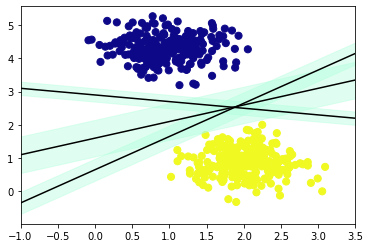

In [101]:
# Creating SVM model
xfit = np.linspace(-1,3.5)
plt.scatter(x[:, 0], x[:, 1], c = y, s = 50, cmap = 'plasma')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none',
    color = '#AFFEDC', alpha = 0.4)
plt.xlim(-1, 3.5)
plt.show()

### 5. Naive Bayes
Classification method based on Bayes' theorem. It assumes that a feature in a class is independent of other features, even if they are. Easy to build a Naive Bayesian model for a large dataset.

#### Advantages:
1. Easy to implement
2. Require small train data to estimate test data

#### Disadvantages:
1. Assuming that features are independent is usually the case in real world.
2. Any new feature in test data with be assigned 0 while making prediction. (Can be solved using Laplace estimation)

#### Use cases:
1. Spam filtering
2. Sentiment prediction
3. Document classification

In [110]:
# Importing libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

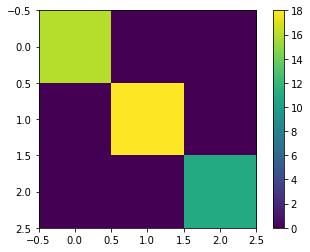

In [112]:
# Loading dataset
iris = datasets.load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Creating Naive Bayes classifier objects
gnb = GaussianNB()
mnb = MultinomialNB()
y_pred_gnb = gnb.fit(x_train, y_train).predict(x_test)
cnf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.imshow(cnf_matrix_gnb)
plt.colorbar()
plt.show()

### 6. k-Nearest Neighbor
Supervised ML algorithm used for classification and regression, but mostly for classification. It considers different centroids and usually uses Euclidian function to compare distance. Then it classifies each point to a group with k nearest points along with it.

#### Advantages:
1. Using Instance-based learning, it does not derive any discriminant function during training period. It stores training data and learns from it to make real-time prediction.
2. New data can be added anytime without impacting the accuracy of the algorithm

#### Disadvantages:
1. Does not work well with large dataset or higher dimension dataset as both degrades the performance of the algorithm.
2. Very sensitive to noisy data and outliers.

#### Use cases:
1. Recommendation system
2. Pattern recognition

In [129]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [121]:
# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 4)
print(x_train.shape)

(90, 4)


In [124]:
# Using logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = knn.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

In [127]:
# Creating kNN classifier object
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

In [128]:
# Training classifier for various values of k
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.95, 0.95, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.95, 0.95]


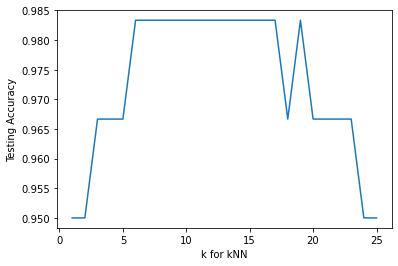

In [130]:
plt.plot(k_range, scores)
plt.xlabel('k for kNN')
plt.ylabel('Testing Accuracy')
plt.show()

### 7. Random Forest
It is an ensembling of decision trees. Every new object is classified based on its attributes and each tree votes for the class. Classification with most votes win the forest.

#### Advantages:
1. Reduces overfitting in decision trees and improves accuracy.
2. Using rule-based approach, data normalization is not required.

#### Disadvantages:
1. Requires lot of computational power as it builds multiple trees.
2. Due to emsembling, it fails to determine significance of each feature.

#### Use cases:
1. Customer analysis
2. Drug and disease analysis

In [144]:
# importing libraries
import numpy as np
import pylab as pl
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

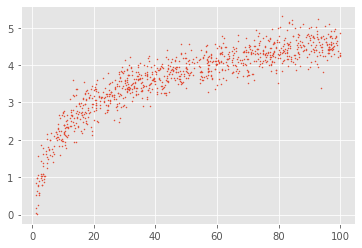

In [145]:
# Creating dataset for visualization
x = np.random.uniform(1,100,1000)
y = np.log(x) + np.random.normal(0,.3,1000)
pl.scatter(x, y, s = 1, label = 'log(x) with noise')

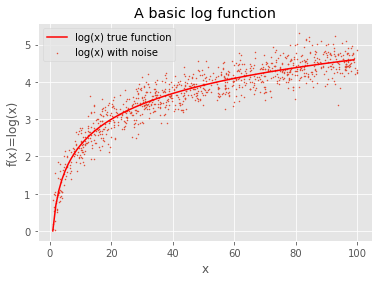

In [147]:
# Visualizing Random Forest
pl.scatter(x, y, s = 1, label = 'log(x) with noise')
pl.plot(np.arange(1,100), np.log(np.arange(1,100)), c = 'r', label = 'log(x) true function')
pl.xlabel('x')
pl.ylabel('f(x)=log(x)')
pl.legend(loc = 'best')
pl.title('A basic log function') 
pl.show()

In [140]:
# Loading dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),is_train,species
0,5.1,3.5,1.4,0.2,False,setosa
1,4.9,3.0,1.4,0.2,True,setosa
2,4.7,3.2,1.3,0.2,True,setosa
3,4.6,3.1,1.5,0.2,True,setosa
4,5.0,3.6,1.4,0.2,True,setosa


In [141]:
# Creating classifier object
train,test = df[df['is_train'] == True], df[df['is_train'] == False]
features = df.columns[:4]
clf = RandomForestClassifier(n_jobs = 2)
y, _ = pd.factorize(train['species'])
clf.fit(train[features], y)

RandomForestClassifier(n_jobs=2)

In [142]:
# Getting predictions
preds = iris.target_names[clf.predict(test[features])]
pd.crosstab(test['species'], preds, rownames = ['actual'], colnames = ['preds'])

preds,setosa,versicolor,virginica
actual,,,
setosa,14,0,0
versicolor,0,16,0
virginica,0,1,15


## Unsupervised Learning

### 1. k-Means Clustering
One of the unsupervised ML algorithm that helps in clustering. It classifies data using number of cluster which can be determined using Elbow or Purpose method. Data points inside a class are homogeneous based on the selected feature.

#### Advantages:
1. It is easy to implement and fast with better computaional cost.
2. It gives the best results if data points are distinct. Even better with spherical clusters.

#### Disadvantages:
1. Cannot work with overlapping data points.
2. Cannot work with noisy data and outliers.

#### Use cases:
1. Document clustering
2. Search engine optimization
3. Feature learning

In [131]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cluster import KMeans

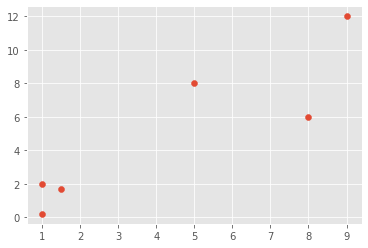

In [132]:
# Creating dataset visualization
style.use('ggplot')
x = [1,5,1.5,8,1,9]
y = [2,8,1.7,6,0.2,12]
plt.scatter(x, y)

In [133]:
# Creating dataset
x = np.array([[1,2],[5,8],[1.5,1.8],[8,8],[1,0.6],[9,11]])

# Creating classifier object
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [134]:
# Fetching centroids for k-means
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)

[[1.16666667 1.46666667]
 [7.33333333 9.        ]]
[0 1 0 1 0 1]


[1. 2.] 0
[5. 8.] 1
[1.5 1.8] 0
[8. 8.] 1
[1.  0.6] 0
[ 9. 11.] 1


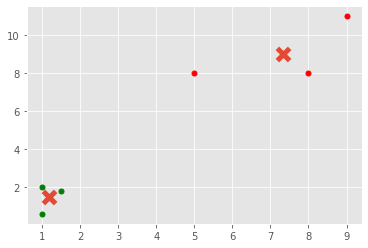

In [135]:
# Plotting output
colors = ['g.','r.','c.','y.']
for i in range(len(x)):
    print(x[i], labels[i])
    plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s = 150, linewidths = 5, zorder = 10)
plt.show()

### 2. Apriori Algorithm
A bottom-up approach of Association Rule Mining algorithm to find underlying relations between different items. It uses concept of 'Support' and 'Confidence' to find association between the items.

#### Advantages:
1. Easy to understand and implement
2. Has many derivatives that improve prediction

#### Disadvantages:
1. Size of itemset can become extremely large
2. Reiterating itemset database can lead to waste of time.

#### Use cases:
1. Market basket analysis
2. Recommendation System
3. Browsing analysis

In [161]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [162]:
# Loading dataset
store_data = pd.read_csv('store_data.csv', header = None)
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
records = []
for i in range(0, 7501):
    records.append([str(store_data.values[i,j]) for j in range(0, 20)])

In [165]:
# Creating apriori object
association_rules = apriori(records, min_support = 0.0045,
                            min_confidence = 0.2, min_lift = 3, min_length = 2)
association_results = list(association_rules)
print(association_results[0])

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])


In [167]:
# Printing association rules
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: chicken -> light cream
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: mushroom cream sauce -> escalope
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
Rule: pasta -> escalope
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: herb & pepper -> ground beef
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: tomato sauce -> ground beef
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: whole wheat pasta -> olive oil
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296
Rule: shrimp -> pasta
Support: 0.005065991201173177
Confidence: 0.3220338983050847
Lift: 4.506672147735896
Rule: chicken -> light cream
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: chocolate -> shrimp
Support: 0.005332622317024397
Confidence: 0.

### Principal Component Analysis
A statistical techniques used to reduce the dimensionality of the data (reduce the number of features in the dataset) by selecting the most important features that capture maximum information about the dataset.

#### Advantages:
1. Reducing overfitting of the model
2. Removes correlational features which lead to improvement in accuracy.

#### Disadvantages:
1. Data standardisation is required before applying PCA.
2. Some of the information is lost if principal components is not selected carefully.

### Uses:
1. Feature extraction
2. Feature elimination

In [151]:
# Importing libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [149]:
# Loading dataset
mnist = fetch_openml('mnist_784')

In [153]:
# Splitting dataset
train_img, test_img, train_lbl, test_lbl = train_test_split(
                        mnist.data, mnist.target, test_size=0.2, random_state=0)

In [155]:
# Fit on training set only.
scaler = StandardScaler()
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [156]:
# Logistic Regression without applying PCA
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_img, train_lbl)

# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))
# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])
logisticRegr.score(test_img, test_lbl)

D:\Anaconda3\envs\ai\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9092857142857143

In [157]:
# Logistic Regression with applying PCA
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)
pca.fit(train_img)

train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_img, train_lbl)

# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))
# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])
logisticRegr.score(test_img, test_lbl)

D:\Anaconda3\envs\ai\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9187142857142857

## Reinforcement Learning

### MDP using Q-learning
Model free reinforcement learning algorithm that seeks to find the best action given the current state. It learns from action taken outside the current policy to maximize the total reward.

#### Advantages:
1. It can solve very complex problems that are difficult using conventional methods.
2. It ignores the given policy to find the optimal policy and maximize reward.

#### Disadvantages:
1. Training neural network via Q-learning has higher variance which can cause problem while converging.
2. Its approach to maximize reward might lead to a path with large negative reward.

#### Use cases:
1. Resource management in computer clusters
2. Autonomous execution in robotics

In [218]:
# Importing libraries
from copy import deepcopy
import numpy as np
import random

In [219]:
# Creating states for MDP
ZOMBIE = "z"
CAR = "c"
ICE_CREAM = "i"
EMPTY = "*"

grid = [
    [ICE_CREAM, EMPTY],
    [ZOMBIE, CAR]
]

for row in grid:
    print(' '.join(row))

i *
z c


In [220]:
# Defining State class
class State:    
    def __init__(self, grid, car_pos):
        self.grid = grid
        self.car_pos = car_pos
        
    def __eq__(self, other):
        return isinstance(other, State) and self.grid == other.grid and self.car_pos == other.car_pos
    
    def __hash__(self):
        return hash(str(self.grid) + str(self.car_pos))
    
    def __str__(self):
        return f"State(grid={self.grid}, car_pos={self.car_pos})"

In [221]:
# Defining Actions and initial state
UP = 0
DOWN = 1
LEFT = 2
RIGHT = 3

ACTIONS = [UP, DOWN, LEFT, RIGHT]

start_state = State(grid=grid, car_pos=[1, 1])

In [222]:
# Defining grid and reward of each tile in the grid
def act(state, action):
    
    def new_car_pos(state, action):
        p = deepcopy(state.car_pos)
        if action == UP:
            p[0] = max(0, p[0] - 1)
        elif action == DOWN:
            p[0] = min(len(state.grid) - 1, p[0] + 1)
        elif action == LEFT:
            p[1] = max(0, p[1] - 1)
        elif action == RIGHT:
            p[1] = min(len(state.grid[0]) - 1, p[1] + 1)
        else:
            raise ValueError(f"Unknown action {action}")
        return p
            
    p = new_car_pos(state, action)
    grid_item = state.grid[p[0]][p[1]]
    
    new_grid = deepcopy(state.grid)
    
    if grid_item == ZOMBIE:
        reward = -100
        is_done = True
        new_grid[p[0]][p[1]] += CAR
    elif grid_item == ICE_CREAM:
        reward = 1000
        is_done = True
        new_grid[p[0]][p[1]] += CAR
    elif grid_item == EMPTY:
        reward = -1
        is_done = False
        old = state.car_pos
        new_grid[old[0]][old[1]] = EMPTY
        new_grid[p[0]][p[1]] = CAR
    elif grid_item == CAR:
        reward = -1
        is_done = False
    else:
        raise ValueError(f"Unknown grid item {grid_item}")
    
    return State(grid=new_grid, car_pos=p), reward, is_done

In [223]:
# Defining parameters
random.seed(42) # for reproducibility

N_STATES = 4
N_EPISODES = 20

MAX_EPISODE_STEPS = 100

MIN_ALPHA = 0.02

alphas = np.linspace(1.0, MIN_ALPHA, N_EPISODES)
gamma = 1.0
eps = 0.2

q_table = dict()

In [224]:
# Q function
def q(state, action=None):
    
    if state not in q_table:
        q_table[state] = np.zeros(len(ACTIONS))
        
    if action is None:
        return q_table[state]
    
    return q_table[state][action]

In [225]:
# Choosing action
def choose_action(state):
    if random.uniform(0, 1) < eps:
        return random.choice(ACTIONS) 
    else:
        return np.argmax(q(state))

In [226]:
# Iterating for learning
for e in range(N_EPISODES):
    
    state = start_state
    total_reward = 0
    alpha = alphas[e]
    
    for _ in range(MAX_EPISODE_STEPS):
        action = choose_action(state)
        next_state, reward, done = act(state, action)
        total_reward += reward
        
        q(state)[action] = q(state, action) + \
                alpha * (reward + gamma *  np.max(q(next_state)) - q(state, action))
        state = next_state
        if done:
            break
    print(f"Episode {e + 1}: total reward -> {total_reward}")

Episode 1: total reward -> 999
Episode 2: total reward -> 998
Episode 3: total reward -> 997
Episode 4: total reward -> 997
Episode 5: total reward -> 999
Episode 6: total reward -> 999
Episode 7: total reward -> 998
Episode 8: total reward -> -100
Episode 9: total reward -> -101
Episode 10: total reward -> 999
Episode 11: total reward -> 999
Episode 12: total reward -> 999
Episode 13: total reward -> 999
Episode 14: total reward -> 999
Episode 15: total reward -> 999
Episode 16: total reward -> 998
Episode 17: total reward -> 999
Episode 18: total reward -> 999
Episode 19: total reward -> 999
Episode 20: total reward -> 999


In [227]:
# Updated reward for each action from start state
r = q(start_state)
print(f"up={r[UP]}, down={r[DOWN]}, left={r[LEFT]}, right={r[RIGHT]}")

up=998.9999564956789, down=225.12936017286486, left=-85.10182825484765, right=586.1924520375833
